In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('credits.csv')
df1

,person_id,id,name,character,role
0,14701,tm77588,Humphrey Bogart,Rick Blaine,ACTOR
1,14702,tm77588,Ingrid Bergman,Ilsa Lund,ACTOR
2,14703,tm77588,Paul Henreid,Victor Laszlo,ACTOR
3,14704,tm77588,Claude Rains,Captain Louis Renault,ACTOR
4,14705,tm77588,Conrad Veidt,Major Heinrich Strasser,ACTOR
...,...,...,...,...,...
64874,59478,tm1304306,Saidah Arrika Ekulona,Miriam,ACTOR
64875,257945,tm1304306,Georgina Elizabeth Okon,Abeni,ACTOR
64876,324787,tm1304306,Chet Anekwe,Uche,ACTOR
64877,2722469,tm1304306,Rebecca Usoro,Leah,ACTOR


In [3]:
df2 = pd.read_csv('titles.csv')
df2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,577842.0,22.005,8.167
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,406105.0,56.631,7.583
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,446627.0,19.900,8.022
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],NaN,tt0037059,7.5,25589.0,8.311,7.000
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,tm1305288,"Marcella Arguello: Bitch, Grow Up!",MOVIE,Arguello couples her larger-than-life stage pr...,2023,R,37,['comedy'],['US'],NaN,tt26623699,6.9,27.0,7.509,2.000
3026,tm1303655,Super-Vilains: l'Enquête,MOVIE,Comic book writers discuss how they make the v...,2023,PG-13,62,['documentation'],['FR'],NaN,tt26498712,5.5,45.0,3.402,6.000
3027,tm1296261,Just a Boy From Tupelo: Bringing Elvis to the ...,MOVIE,"Director Baz Luhrmann, actors Austin Butler an...",2023,PG-13,27,['documentation'],[],NaN,NaN,NaN,NaN,2.605,4.500
3028,tm1065897,Dionne Warwick: Don't Make Me Over,MOVIE,The story of the iconic singer's fascinating s...,2023,PG,95,"['documentation', 'music']","['US', 'GB']",NaN,tt6170406,7.8,255.0,9.371,NaN


In [4]:
# Read the two datasets
df1 = pd.read_csv("credits.csv")
df2 = pd.read_csv("titles.csv")

# Merge the two datasets on the common "id" column
df = pd.merge(df1, df2, on="id")

# Print the merged dataset
print(df)

       person_id         id                     name                character  \
0          14701    tm77588          Humphrey Bogart              Rick Blaine   
1          14702    tm77588           Ingrid Bergman                Ilsa Lund   
2          14703    tm77588             Paul Henreid            Victor Laszlo   
3          14704    tm77588             Claude Rains    Captain Louis Renault   
4          14705    tm77588             Conrad Veidt  Major Heinrich Strasser   
...          ...        ...                      ...                      ...   
64874      59478  tm1304306    Saidah Arrika Ekulona                   Miriam   
64875     257945  tm1304306  Georgina Elizabeth Okon                    Abeni   
64876     324787  tm1304306              Chet Anekwe                     Uche   
64877    2722469  tm1304306            Rebecca Usoro                     Leah   
64878    2722469  tm1304306            Rebecca Usoro                      NaN   

           role            

In [5]:
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64879 entries, 0 to 64878
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   person_id             64879 non-null  int64  
 1   id                    64879 non-null  object 
 2   name                  64879 non-null  object 
 3   character             60648 non-null  object 
 4   role                  64879 non-null  object 
 5   title                 64879 non-null  object 
 6   type                  64879 non-null  object 
 7   description           64847 non-null  object 
 8   release_year          64879 non-null  int64  
 9   age_certification     49068 non-null  object 
 10  runtime               64879 non-null  int64  
 11  genres                64879 non-null  object 
 12  production_countries  64879 non-null  object 
 13  seasons               3902 non-null   float64
 14  imdb_id               62215 non-null  object 
 15  imdb_score         

In [7]:
len(df)

64879

In [8]:
df.shape

(64879, 19)

In [9]:
df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6.487900e+04,64879.000000,64879.000000,3902.000000,62031.000000,6.188000e+04,64879.000000,64239.000000
mean,4.176436e+05,1996.846437,105.613665,2.925423,6.898211,1.444355e+05,24.293571,6.835089
std,6.476459e+05,23.829735,33.584595,3.012207,0.996432,2.945137e+05,42.674688,0.873853
min,2.400000e+01,1901.000000,1.000000,1.000000,1.500000,5.000000e+00,0.050200,1.000000
25%,1.881000e+04,1986.000000,90.000000,1.000000,6.300000,7.791000e+03,8.449000,6.300000
50%,7.991400e+04,2005.000000,105.000000,2.000000,7.000000,3.758900e+04,14.383000,6.900000
75%,5.675565e+05,2015.000000,120.000000,4.000000,7.600000,1.362760e+05,25.917000,7.449500
max,2.770777e+06,2023.000000,299.000000,53.000000,9.400000,2.684317e+06,3481.253000,10.000000


In [10]:
#Finding Duplicated value
df.duplicated().sum()

0

In [11]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['id', 'name', 'character', 'role', 'title', 'type', 'description',
       'age_certification', 'genres', 'production_countries', 'imdb_id'],
      dtype='object')

In [12]:
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['person_id', 'release_year', 'runtime', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [13]:
df.isnull().sum()

person_id                   0
id                          0
name                        0
character                4231
role                        0
title                       0
type                        0
description                32
release_year                0
age_certification       15811
runtime                     0
genres                      0
production_countries        0
seasons                 60977
imdb_id                  2664
imdb_score               2848
imdb_votes               2999
tmdb_popularity             0
tmdb_score                640
dtype: int64

In [14]:
# Calculate the mean of the imdb_score column
mean_score = df['imdb_score'].mean()

# Impute the missing values in imdb_score with the mean
df['imdb_score'].fillna(mean_score, inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

person_id                   0
id                          0
name                        0
character                4231
role                        0
title                       0
type                        0
description                32
release_year                0
age_certification       15811
runtime                     0
genres                      0
production_countries        0
seasons                 60977
imdb_id                  2664
imdb_score                  0
imdb_votes               2999
tmdb_popularity             0
tmdb_score                640
dtype: int64


In [15]:
# Impute missing values with mean
imdb_mean = df['imdb_score'].mean()
df['imdb_score'].fillna(imdb_mean, inplace=True)

tmdb_mean = df['tmdb_score'].mean()
df['tmdb_score'].fillna(tmdb_mean, inplace=True)

In [16]:
# Impute missing values with mode
age_mode = df['age_certification'].mode()[0]
df['age_certification'].fillna(age_mode, inplace=True)

In [17]:
# Impute missing values with 'Unknown'
df['character'].fillna('Unknown', inplace=True)

In [18]:
# Impute missing numerical values with median
num_cols = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Impute missing categorical values with mode
cat_cols = ['description', 'seasons', 'imdb_id']
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [19]:
print(df.isnull().sum())

person_id               0
id                      0
name                    0
character               0
role                    0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


In [20]:
# perform an eda

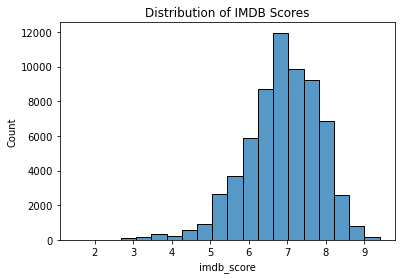

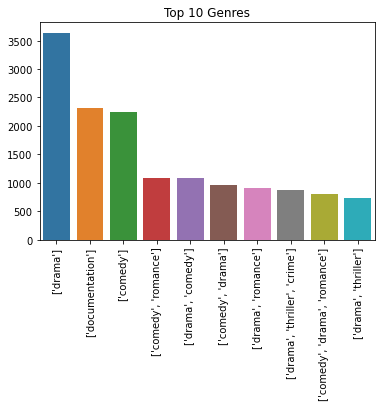

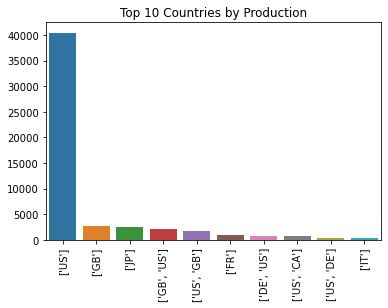

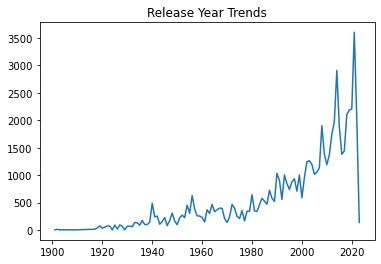

In [21]:
# visualize distribution of IMDB scores
sns.histplot(data=df, x="imdb_score", bins=20)
plt.title("Distribution of IMDB Scores")
plt.show()

# visualize top 10 genres
top_genres = df["genres"].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top 10 Genres")
plt.xticks(rotation=90)
plt.show()

# visualize top 10 countries by production
top_countries = df["production_countries"].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Production")
plt.xticks(rotation=90)
plt.show()

# visualize release year trends
year_counts = df["release_year"].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Release Year Trends")
plt.show()


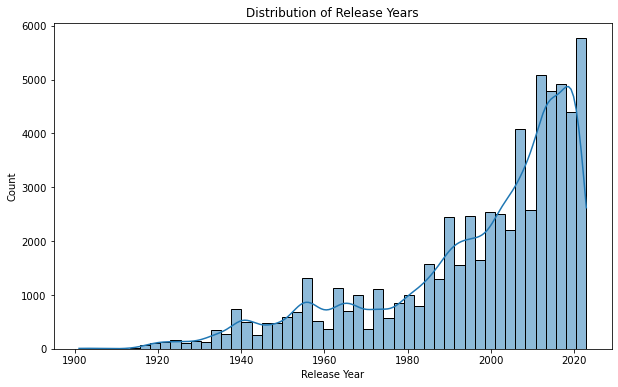

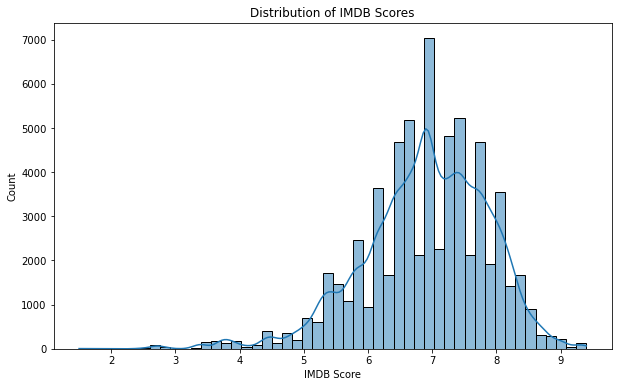

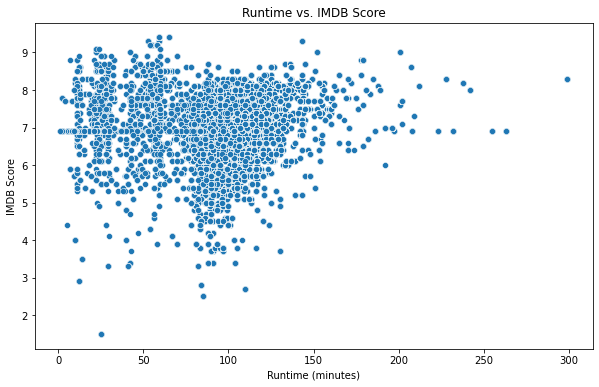

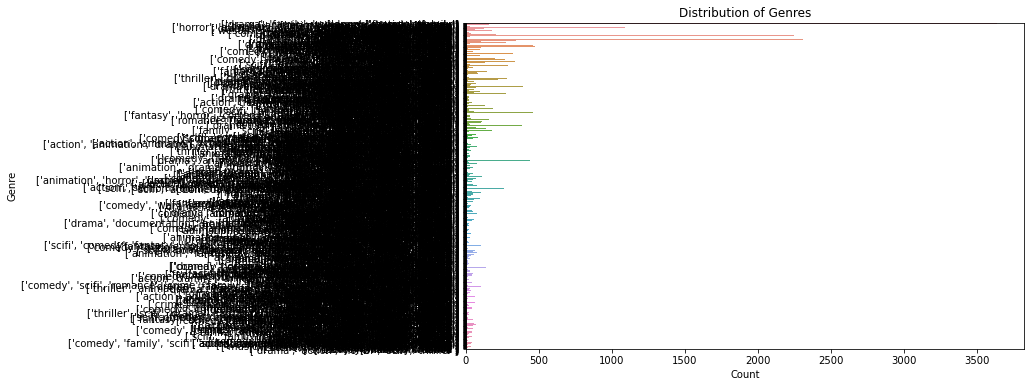

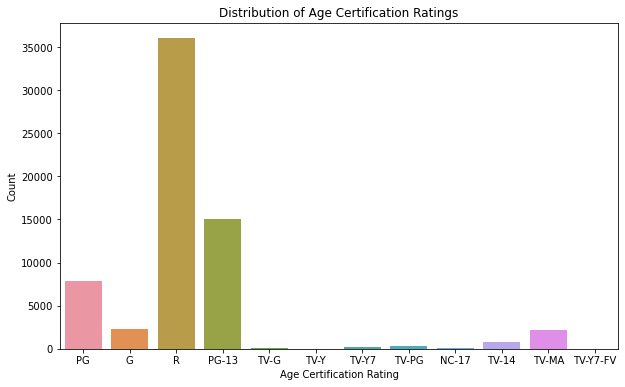

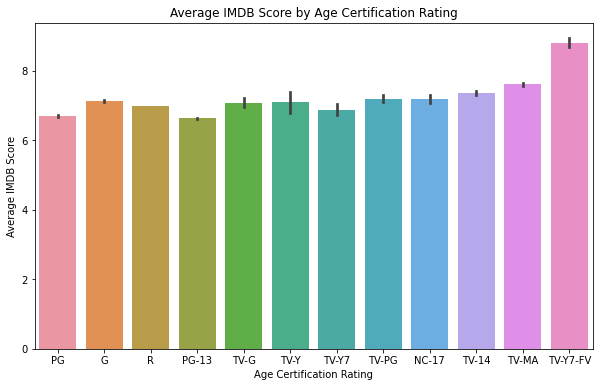

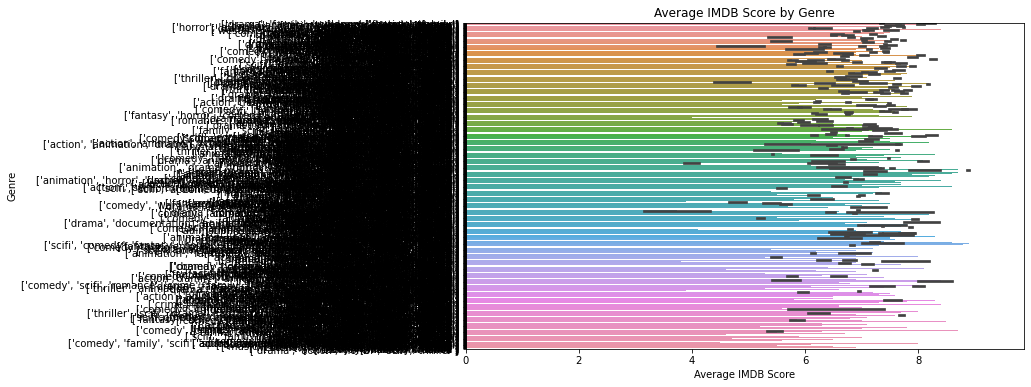

In [22]:
# Plot the distribution of release years
plt.figure(figsize=(10,6))
sns.histplot(df, x="release_year", bins=50, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

# Plot the distribution of IMDB scores
plt.figure(figsize=(10,6))
sns.histplot(df, x="imdb_score", bins=50, kde=True)
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.show()

# Plot the relationship between runtime and IMDB score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="runtime", y="imdb_score")
plt.title("Runtime vs. IMDB Score")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Score")
plt.show()

# Plot the distribution of genres
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="genres")
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Plot the distribution of age certification ratings
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="age_certification")
plt.title("Distribution of Age Certification Ratings")
plt.xlabel("Age Certification Rating")
plt.ylabel("Count")
plt.show()

# Plot the average IMDB score by age certification rating
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="age_certification", y="imdb_score")
plt.title("Average IMDB Score by Age Certification Rating")
plt.xlabel("Age Certification Rating")
plt.ylabel("Average IMDB Score")
plt.show()

# Plot the average IMDB score by genre
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="imdb_score", y="genres")
plt.title("Average IMDB Score by Genre")
plt.xlabel("Average IMDB Score")
plt.ylabel("Genre")
plt.show()

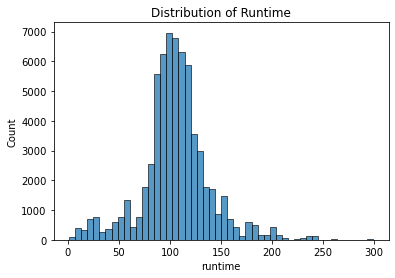

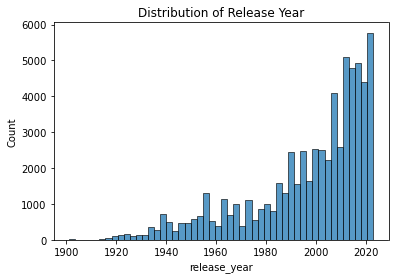

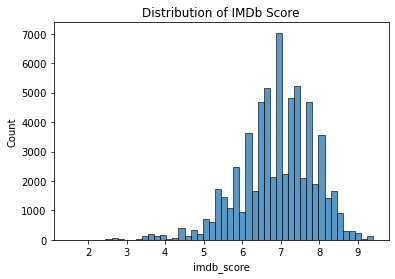

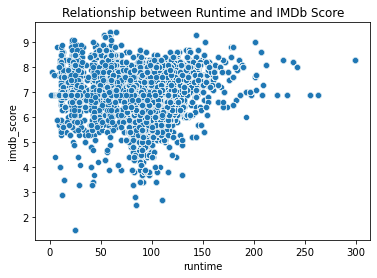

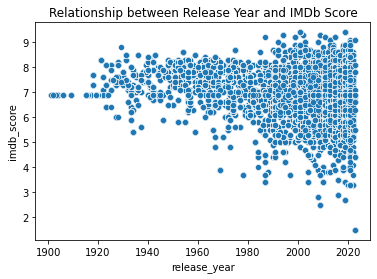

Top Rated Movies:
                  title  release_year  imdb_score
54747         Chernobyl          2019         9.4
54743         Chernobyl          2019         9.4
27627  Band of Brothers          2001         9.4
54735         Chernobyl          2019         9.4
54736         Chernobyl          2019         9.4
54737         Chernobyl          2019         9.4
54738         Chernobyl          2019         9.4
54739         Chernobyl          2019         9.4
54740         Chernobyl          2019         9.4
54741         Chernobyl          2019         9.4
Most Common Genres:
['drama'       18515
['comedy'      10802
'drama'         8918
'action'        8693
'thriller'      6908
'romance']      6868
'crime']        6536
'drama']        6190
'comedy'        5945
'european']     5821
Name: genres, dtype: int64
Most Common Production Countries:
['US']    40424
'US']      5801
['US'      5088
['GB']     2795
['GB'      2562
['JP']     2494
'GB']      2480
['FR'      1447
'FR']      13

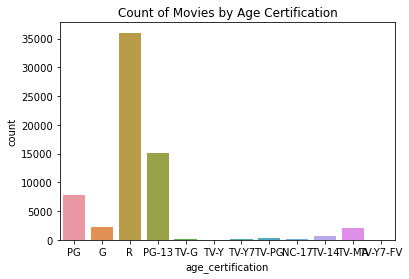

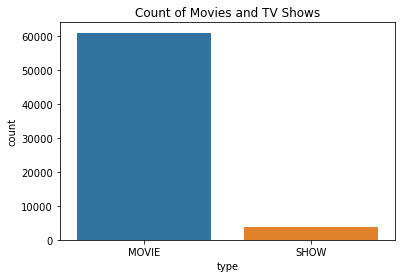

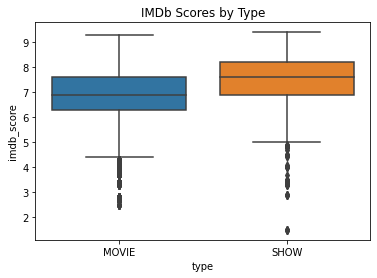

In [23]:
# Analyze the distribution of numerical variables
sns.histplot(df['runtime'], bins=50)
plt.title('Distribution of Runtime')
plt.show()

sns.histplot(df['release_year'], bins=50)
plt.title('Distribution of Release Year')
plt.show()

sns.histplot(df['imdb_score'], bins=50)
plt.title('Distribution of IMDb Score')
plt.show()

# Investigate the relationships between variables
sns.scatterplot(data=df, x='runtime', y='imdb_score')
plt.title('Relationship between Runtime and IMDb Score')
plt.show()

sns.scatterplot(data=df, x='release_year', y='imdb_score')
plt.title('Relationship between Release Year and IMDb Score')
plt.show()

# Identify the top-rated movies
top_rated = df.sort_values('imdb_score', ascending=False).head(10)
print('Top Rated Movies:')
print(top_rated[['title', 'release_year', 'imdb_score']])

# Analyze the most common genres and production countries
genres = df['genres'].str.split(', ').explode().value_counts().head(10)
print('Most Common Genres:')
print(genres)

countries = df['production_countries'].str.split(', ').explode().value_counts().head(10)
print('Most Common Production Countries:')
print(countries)

# Create visualizations
sns.countplot(data=df, x='age_certification')
plt.title('Count of Movies by Age Certification')
plt.show()

sns.countplot(data=df, x='type')
plt.title('Count of Movies and TV Shows')
plt.show()

sns.boxplot(data=df, x='type', y='imdb_score')
plt.title('IMDb Scores by Type')
plt.show()

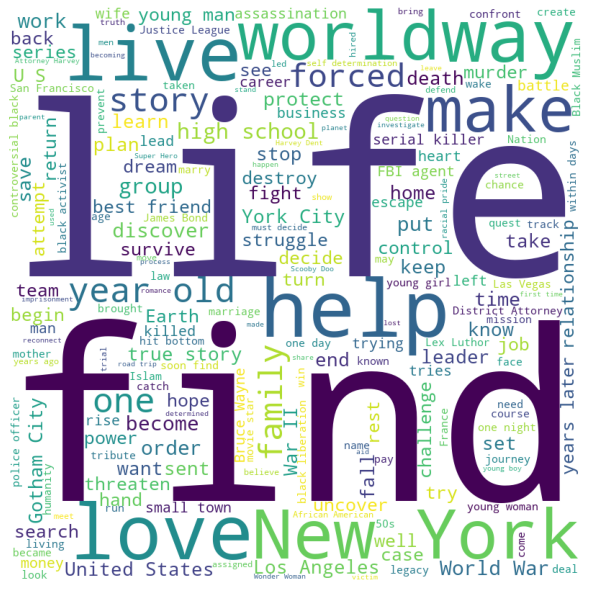

In [24]:
from wordcloud import WordCloud, STOPWORDS
# concatenate all the descriptions into a single string
all_descriptions = ' '.join(df['description'].astype(str).tolist())

# create a word cloud of the most common words in the descriptions
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(all_descriptions)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# show the plot
plt.show()

In [25]:
# Group the movies by genre and calculate the mean IMDb score and popularity score for each genre
genre_stats = df.groupby("genres")[["imdb_score", "tmdb_popularity"]].mean().sort_values(by="imdb_score", ascending=False)

# Group the movies by production country and calculate the mean IMDb score and popularity score for each country
country_stats = df.groupby("production_countries")[["imdb_score", "tmdb_popularity"]].mean().sort_values(by="imdb_score", ascending=False)

# Print the top 10 genres with the highest IMDb scores and popularity scores
print("Top 10 genres by IMDb score:")
print(genre_stats.head(10))
print("\nTop 10 genres by popularity score:")
print(genre_stats.sort_values(by="tmdb_popularity", ascending=False).head(10))

# Print the top 10 production countries with the highest IMDb scores and popularity scores
print("\nTop 10 production countries by IMDb score:")
print(country_stats.head(10))
print("\nTop 10 production countries by popularity score:")
print(country_stats.sort_values(by="tmdb_popularity", ascending=False).head(10))

Top 10 genres by IMDb score:
                                                    imdb_score  \
genres                                                           
['drama', 'war', 'history', 'action']                 9.400000   
['scifi', 'drama', 'action', 'romance', 'fantasy']    9.200000   
['drama', 'action', 'horror', 'scifi', 'thriller']    9.100000   
['family', 'scifi', 'animation', 'action', 'cri...    9.000000   
['documentation', 'animation', 'reality']             8.900000   
['comedy', 'reality', 'history']                      8.900000   
['fantasy', 'action', 'drama']                        8.881865   
['comedy', 'family', 'thriller', 'animation']         8.800000   
['drama', 'reality']                                  8.800000   
['action', 'fantasy', 'drama']                        8.800000   

                                                    tmdb_popularity  
genres                                                               
['drama', 'war', 'history', 'action'] 

In [26]:
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [27]:
df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,14701,tm77588,Humphrey Bogart,Rick Blaine,ACTOR,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],1.0,tt0034583,8.5,577842.0,22.005,8.167
1,14702,tm77588,Ingrid Bergman,Ilsa Lund,ACTOR,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],1.0,tt0034583,8.5,577842.0,22.005,8.167
2,14703,tm77588,Paul Henreid,Victor Laszlo,ACTOR,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],1.0,tt0034583,8.5,577842.0,22.005,8.167
3,14704,tm77588,Claude Rains,Captain Louis Renault,ACTOR,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],1.0,tt0034583,8.5,577842.0,22.005,8.167
4,14705,tm77588,Conrad Veidt,Major Heinrich Strasser,ACTOR,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],1.0,tt0034583,8.5,577842.0,22.005,8.167


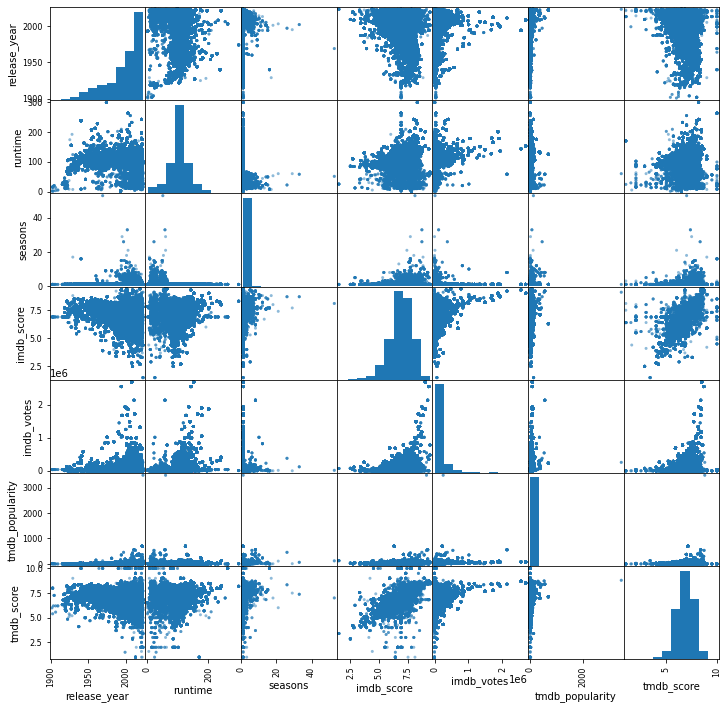

In [28]:
from pandas.plotting import scatter_matrix
# Select numerical columns
numerical_cols = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# Create scatter plot matrix
scatter_matrix(df[numerical_cols], figsize=(12, 12), diagonal='hist')
plt.show()

In [29]:
# create a regression model on most popular movies

In [30]:
popular_movies = df[df['tmdb_popularity'] >= 3.0]

In [31]:
import statsmodels.api as sm
X = popular_movies[['release_year', 'runtime', 'seasons', 'tmdb_popularity', 'tmdb_score']]
y = popular_movies['imdb_score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 3.446e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:58:23   Log-Likelihood:                -44543.
No. Observations:               60868   AIC:                         8.910e+04
Df Residuals:                   60862   BIC:                         8.915e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2058      0.190     37.923      0.000       6.833       7.578
release_year       -0.0036   9.23e-05    -39.082      0.000      -0.004      -0.003
runtime             0.0016   7.03e-05     23.111      0.000       0.001       0.002
seasons             0.0429      0.003     16.597      0.000       0.038       0.048
tmdb_popularity    -0.0013   4.99e-05    -26.896      0.000      -0.001      -0.001
tmdb_score          0.9798      0.003    372.023      0.000       0.975       0.985
==============================================================================
Omnibus:                    12762.113   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431203.599
Skew:                           0.246   Prob(JB):                         0.00
Kurtosis:                      16.030   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = popular_movies['tmdb_score']
y = popular_movies['imdb_score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.599e+05
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:58:23   Log-Likelihood:                -46208.
No. Observations:               60868   AIC:                         9.242e+04
Df Residuals:                   60866   BIC:                         9.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.017     -0.301      0.763      -0.039       0.029
tmdb_score     1.0083      0.003    399.883      0.000       1.003       1.013
==============================================================================
Omnibus:                    11809.470   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           362795.225
Skew:                          -0.128   Prob(JB):                         0.00
Kurtosis:                      14.958   Cond. No.                         58.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

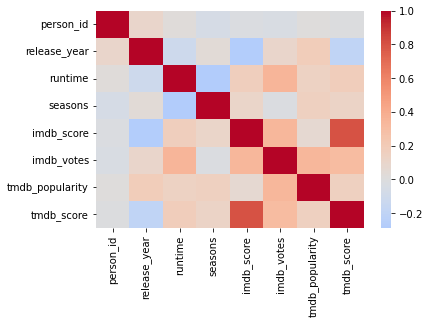

In [33]:
# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.show()

In [34]:
# Find columns with non-numeric values
non_numeric_cols = []
for col in df.columns:
    if df[col].dtype == 'O':
        try:
            df[col].astype(float)
        except ValueError:
            non_numeric_cols.append(col)

# Print non-numeric columns
print(non_numeric_cols)

['id', 'name', 'character', 'role', 'title', 'type', 'description', 'age_certification', 'genres', 'production_countries', 'imdb_id']


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Filter the most popular movies
popular_movies = df[df['tmdb_popularity'] >= 3.0]

# Define the features and target variable
X = popular_movies[['tmdb_popularity', 'tmdb_score', 'release_year']]
y = popular_movies['imdb_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Evaluate the performance of the model
score = model.score(X_test, y_test)
print("R^2 score: {:.2f}".format(score))
print('Mean squared error:', mse)
print('Mean absolute error:', mae)

R^2 score: 0.72
Mean squared error: 0.26425992049668967
Mean absolute error: 0.3285776668721425
